<h1 class="text_center">Project description<br> <br>(Classification, ROC curve, TPR, FPR, PR curve, Threshold, Upsampling, Downsampling)</h1><br>
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.<br>

We need to predict whether a customer will leave the bank soon. I have the data on clients’ past behavior and termination of contracts with the bank.<br>

Additionally, measure the AUC-ROC metric and compare it with the F1.

<h3 class="text_center">Data description</h3>

**Features**<br>
RowNumber — data string index<br> 
CustomerId — unique customer identifier<br> 
Surname — surname<br> 
CreditScore — credit score<br> 
Geography — country of residence<br> 
Gender — gender<br> 
Age — age<br> 
Tenure — period of maturation for a customer’s fixed deposit (years)<br> 
Balance — account balance<br> 
NumOfProducts — number of banking products used by the customer<br> 
HasCrCard — customer has a credit card<br> 
IsActiveMember — customer’s activeness<br> 
EstimatedSalary — estimated salary<br>

**Target**<br> 
Exited — сustomer has left<br> 

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, precision_recall_curve
from sklearn.utils import shuffle


In [10]:
data_primary = pd.read_csv('./Churn.csv')
data_primary.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
data_primary.shape

(10000, 14)

In [12]:
data_primary.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [13]:
data_primary.loc[data_primary['Tenure'].isnull(), 'Tenure'] = 5.0

Fill NA in column Tenure with mean.

Types of data columns are good. We just need delete some columns to use data for Classification.

In [15]:
data_prepared = data_primary.drop(['RowNumber', 'CreditScore', 'Surname', 'CustomerId'], axis=1)
data_prepared.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


To classification we need change categorical observations to numerical. For LogisticRegression we will do dummies.

In [16]:
data_dummies = pd.get_dummies(data_prepared, drop_first=True)
data_dummies.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


After we need to lead to a single scale over columns.

In [19]:
numeric = ['Balance', 'Age', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(data_dummies[numeric])

data_scalered = data_dummies.copy()
data_scalered[numeric] = scaler.transform(data_dummies[numeric])
data_scalered


,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.293517,2.0,-1.225848,1,1,1,0.021886,1,0,0,0
1,0.198164,1.0,0.117350,1,0,1,0.216534,0,0,1,0
2,0.293517,8.0,1.333053,3,1,0,0.240687,1,0,0,0
3,0.007457,1.0,-1.225848,2,0,0,-0.108918,0,0,0,0
4,0.388871,2.0,0.785728,1,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.007457,5.0,-1.225848,2,1,0,-0.066419,0,0,0,1
9996,-0.373958,10.0,-0.306379,1,1,1,0.027988,0,0,0,1
9997,-0.278604,7.0,-1.225848,1,0,1,-1.008643,1,0,0,0
9998,0.293517,3.0,-0.022608,2,1,0,-0.125231,1,1,0,1


Now it is time to fit our model. We share our data for 3 sample: valid, train, test.

In [20]:
features = data_scalered.drop('Exited', axis=1)
target = data_scalered['Exited']

In [21]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)


In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('R2 - {}'.format((accuracy_score(predicted_valid, target_valid))))


R2 - 0.8045


Our model show good result, but need to check it for sanity. If we count target column, we will see that R2 show percent of '0' negative observation of all observations '0' + '1'. 

Let's create column with only zeros and check R2 for our constant model.

In [23]:
data_prepared['Exited'].value_counts().sort_index()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
target_pred_constant = pd.Series([0 for x in range(target_valid.shape[0])])

print(accuracy_score(target_valid, target_pred_constant))

0.791


The same result. It is mean that we can use model where we predict only zeroes :)

We need use different metric here. We will take: $$F1 = \frac{2*RECALL*PRECISION}{RECALL+PRECISION}$$<br> $$RECALL = \frac{TP}{TP+FN}$$ <br> $$PRECISION=\frac{TP}{TP+FP}$$ TP, FP and FN - we can take from table below.

In [25]:
confusion_matrix(target_valid, predicted_valid)

array([[1513,   69],
       [ 322,   96]])

In [26]:
print('F1 - {}'.format((f1_score(predicted_valid, target_valid))))

F1 - 0.3293310463121784


Now new metric tell us that our model not good predict the class. OK, now let's play with F1 score, we will change Threshold value and try to find max F1.

In [27]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [28]:
for threshold in np.arange(0, 0.9, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f_1 = f1_score(predicted_valid, target_valid)

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1 - {:.3f}".format(
        threshold, precision, recall, f_1))

Threshold = 0.00 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.05 | Precision = 0.234, Recall = 0.978 | F1 - 0.378
Threshold = 0.10 | Precision = 0.275, Recall = 0.892 | F1 - 0.421
Threshold = 0.15 | Precision = 0.328, Recall = 0.792 | F1 - 0.464
Threshold = 0.20 | Precision = 0.374, Recall = 0.682 | F1 - 0.483
Threshold = 0.25 | Precision = 0.419, Recall = 0.591 | F1 - 0.491
Threshold = 0.30 | Precision = 0.456, Recall = 0.510 | F1 - 0.481
Threshold = 0.35 | Precision = 0.487, Recall = 0.416 | F1 - 0.449
Threshold = 0.40 | Precision = 0.505, Recall = 0.337 | F1 - 0.405
Threshold = 0.45 | Precision = 0.547, Recall = 0.292 | F1 - 0.381
Threshold = 0.50 | Precision = 0.582, Recall = 0.230 | F1 - 0.329
Threshold = 0.55 | Precision = 0.621, Recall = 0.172 | F1 - 0.270
Threshold = 0.60 | Precision = 0.671, Recall = 0.132 | F1 - 0.220
Threshold = 0.65 | Precision = 0.660, Recall = 0.084 | F1 - 0.149
Threshold = 0.70 | Precision = 0.710, Recall = 0.053 | F1 - 0.098
Threshold 

We took max F1 when Threshold is 0.25. Below we show the graph and red point, that show best attitude between Recall and Precision for predict values.

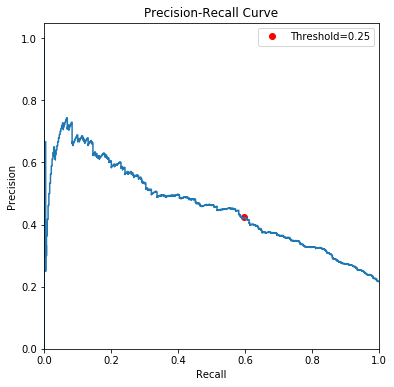

In [29]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(0.598, 0.424, 'ro', label='Threshold=0.25')
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

For a model that always answers randomly, the ROC curve is a diagonal line going from the lower left to the upper right. The higher the curve, the greater the TPR value and the better the model's quality. 

To find how much our model differs from the random model, let's calculate the AUC-ROC value (Area Under Curve ROC) This is a new evaluation metric with values in the range from 0 to 1. The AUC-ROC value for a random model is 0.5.

In [30]:
def plotROC(target_valid, probabilities_one_valid):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

    plt.figure()

    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim(0,1)
    plt.ylim(0,1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC curve')

    plt.show()
    
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    print('Area under ROC curve:', auc_roc)

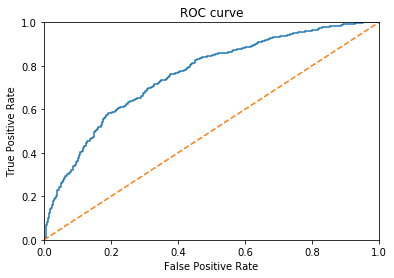

Area under ROC curve: 0.7584457926796073


In [31]:
plotROC(target_valid, probabilities_one_valid)

### Upsampling

OK, now we will try to get more accuracy for our model. When we fit model, we use train sample with 4:1 relation between negative and positive. Because of with our model predict worse then if relation will be 1:1. 

We will use upsample and downsample to get relation between negative and positive equal 1:1.

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
    

In [33]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [34]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('R2 - {}'.format((accuracy_score(predicted_valid, target_valid))))


R2 - 0.705


In [35]:
print('F1 - {}'.format((f1_score(predicted_valid, target_valid))))

F1 - 0.49399656946826753


In [36]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


In [37]:
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f_1 = f1_score(predicted_valid, target_valid)

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1 - {:.3f}".format(
        threshold, precision, recall, f_1))

Threshold = 0.00 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.05 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.10 | Precision = 0.215, Recall = 1.000 | F1 - 0.354
Threshold = 0.15 | Precision = 0.228, Recall = 0.988 | F1 - 0.371
Threshold = 0.20 | Precision = 0.240, Recall = 0.967 | F1 - 0.385
Threshold = 0.25 | Precision = 0.258, Recall = 0.933 | F1 - 0.405
Threshold = 0.30 | Precision = 0.278, Recall = 0.907 | F1 - 0.426
Threshold = 0.35 | Precision = 0.302, Recall = 0.868 | F1 - 0.448
Threshold = 0.40 | Precision = 0.328, Recall = 0.816 | F1 - 0.468
Threshold = 0.45 | Precision = 0.355, Recall = 0.749 | F1 - 0.482
Threshold = 0.50 | Precision = 0.385, Recall = 0.689 | F1 - 0.494
Threshold = 0.55 | Precision = 0.409, Recall = 0.617 | F1 - 0.492
Threshold = 0.60 | Precision = 0.446, Recall = 0.557 | F1 - 0.496
Threshold = 0.65 | Precision = 0.480, Recall = 0.481 | F1 - 0.480
Threshold = 0.70 | Precision = 0.489, Recall = 0.376 | F1 - 0.425
Threshold 

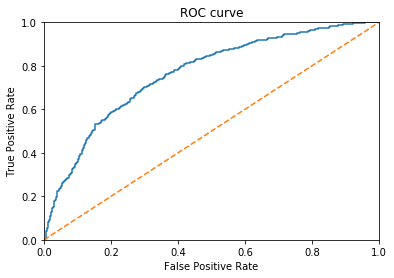

Area under ROC curve: 0.7634119490197737


In [38]:
plotROC(target_valid, probabilities_one_valid)

### Downsampling

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [40]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [41]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('R2 - {}'.format((accuracy_score(predicted_valid, target_valid))))


R2 - 0.7025


In [42]:
print('F1 - {}'.format((f1_score(predicted_valid, target_valid))))

F1 - 0.48751076658053405


In [43]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [44]:
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f_1 = f1_score(predicted_valid, target_valid)

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1 - {:.3f}".format(
        threshold, precision, recall, f_1))

Threshold = 0.00 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.05 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.10 | Precision = 0.216, Recall = 1.000 | F1 - 0.355
Threshold = 0.15 | Precision = 0.228, Recall = 0.988 | F1 - 0.370
Threshold = 0.20 | Precision = 0.243, Recall = 0.967 | F1 - 0.388
Threshold = 0.25 | Precision = 0.260, Recall = 0.931 | F1 - 0.406
Threshold = 0.30 | Precision = 0.281, Recall = 0.909 | F1 - 0.429
Threshold = 0.35 | Precision = 0.302, Recall = 0.868 | F1 - 0.449
Threshold = 0.40 | Precision = 0.330, Recall = 0.816 | F1 - 0.470
Threshold = 0.45 | Precision = 0.357, Recall = 0.746 | F1 - 0.483
Threshold = 0.50 | Precision = 0.381, Recall = 0.677 | F1 - 0.488
Threshold = 0.55 | Precision = 0.413, Recall = 0.622 | F1 - 0.497
Threshold = 0.60 | Precision = 0.442, Recall = 0.560 | F1 - 0.494
Threshold = 0.65 | Precision = 0.473, Recall = 0.478 | F1 - 0.476
Threshold = 0.70 | Precision = 0.487, Recall = 0.392 | F1 - 0.434
Threshold 

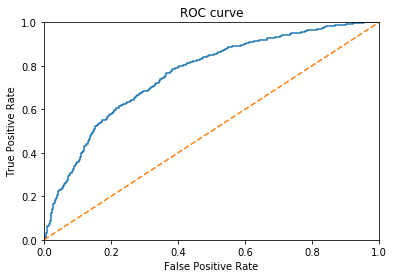

Area under ROC curve: 0.7616925459263607


In [45]:
plotROC(target_valid, probabilities_one_valid)

Our accuracy is not best, may be. We need try to use another model, Because of low quality and accuracy.

## DesigionTrees

In [46]:
data_prepared.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Here we use OrdenalEncoder instead Dummies because it is better work with Trees.

In [47]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data_prepared),
                            columns=data_prepared.columns)

In [48]:
data_ordinal.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0


In [49]:
data_scalered = data_ordinal.copy()
data_scalered[numeric] = scaler.transform(data_ordinal[numeric])
data_scalered

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,0.0,-1.422847,2.0,-1.225848,0.0,1.0,1.0,-1.652342,1.0
1,2.0,0.0,-1.518201,1.0,-1.213940,0.0,0.0,1.0,-1.642413,0.0
2,0.0,0.0,-1.422847,8.0,-1.133003,2.0,1.0,0.0,-1.641230,1.0
3,0.0,0.0,-1.708908,1.0,-1.225848,1.0,0.0,0.0,-1.658671,0.0
4,2.0,0.0,-1.327494,2.0,-1.166611,0.0,1.0,1.0,-1.672217,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,-1.708908,5.0,-1.225848,1.0,1.0,0.0,-1.656533,0.0
9996,0.0,1.0,-2.090322,10.0,-1.223860,0.0,1.0,1.0,-1.652011,0.0
9997,0.0,0.0,-1.994969,7.0,-1.225848,0.0,0.0,1.0,-1.704613,1.0
9998,1.0,1.0,-1.422847,3.0,-1.219004,1.0,1.0,0.0,-1.659802,1.0


In [50]:
features = data_scalered.drop('Exited', axis=1)
target = data_scalered['Exited']


In [51]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)


In [52]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [53]:
tree = RandomForestClassifier(random_state=12345)
tree.fit(features_downsampled, target_downsampled)
predicted_valid = tree.predict(features_valid)
print('R2 - {}'.format((accuracy_score(predicted_valid, target_valid))))

R2 - 0.7725


In [54]:
mxN = (0, 0)
for depth in np.arange(1,20,1):
    tree = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=20)
    tree.fit(features_downsampled, target_downsampled)
    predicted_valid = tree.predict(features_valid)
    if f1_score(predicted_valid, target_valid) > mxN[1]:
        mxN = (depth, f1_score(predicted_valid, target_valid)) 
    print('R2 - {}, depth - {}, F1 - {}'.format(tree.score(features_valid, target_valid), depth, f1_score(predicted_valid, target_valid)))

print('result', mxN)


R2 - 0.769, depth - 1, F1 - 0.5616698292220115
R2 - 0.7465, depth - 2, F1 - 0.5548726953467954
R2 - 0.7525, depth - 3, F1 - 0.5638766519823788
R2 - 0.78, depth - 4, F1 - 0.5849056603773585
R2 - 0.7795, depth - 5, F1 - 0.5912882298424468
R2 - 0.7705, depth - 6, F1 - 0.5815861440291705
R2 - 0.7715, depth - 7, F1 - 0.582648401826484
R2 - 0.7745, depth - 8, F1 - 0.5827937095282145
R2 - 0.7725, depth - 9, F1 - 0.5767441860465116
R2 - 0.772, depth - 10, F1 - 0.5801104972375691
R2 - 0.761, depth - 11, F1 - 0.5670289855072463
R2 - 0.7675, depth - 12, F1 - 0.5666356011183598
R2 - 0.7645, depth - 13, F1 - 0.5768194070080862
R2 - 0.7585, depth - 14, F1 - 0.5652565256525652
R2 - 0.7515, depth - 15, F1 - 0.5534591194968553
R2 - 0.769, depth - 16, F1 - 0.5738007380073802
R2 - 0.7725, depth - 17, F1 - 0.5814167433302667
R2 - 0.761, depth - 18, F1 - 0.5622710622710624
R2 - 0.7745, depth - 19, F1 - 0.5765258215962441
result (5, 0.5912882298424468)


Max F1 with depth = 5. Also we use only 20 tree in our forest. Let's fit model with 100 n_estimators.

In [55]:
tree = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=100)
tree.fit(features_downsampled, target_downsampled)
predicted_valid = tree.predict(features_valid)

In [56]:
print('F1 - {}'.format((f1_score(predicted_valid, target_valid))))

F1 - 0.5901027077497666


In [57]:
probabilities_valid = tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [58]:
for threshold in np.arange(0, 0.9, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f_1 = f1_score(predicted_valid, target_valid)

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1 - {:.3f}".format(
        threshold, precision, recall, f_1))

Threshold = 0.00 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.05 | Precision = 0.209, Recall = 1.000 | F1 - 0.346
Threshold = 0.10 | Precision = 0.212, Recall = 1.000 | F1 - 0.350
Threshold = 0.15 | Precision = 0.227, Recall = 0.988 | F1 - 0.370
Threshold = 0.20 | Precision = 0.246, Recall = 0.981 | F1 - 0.394
Threshold = 0.25 | Precision = 0.265, Recall = 0.957 | F1 - 0.415
Threshold = 0.30 | Precision = 0.295, Recall = 0.931 | F1 - 0.448
Threshold = 0.35 | Precision = 0.334, Recall = 0.911 | F1 - 0.489
Threshold = 0.40 | Precision = 0.369, Recall = 0.852 | F1 - 0.515
Threshold = 0.45 | Precision = 0.422, Recall = 0.801 | F1 - 0.553
Threshold = 0.50 | Precision = 0.484, Recall = 0.756 | F1 - 0.590
Threshold = 0.55 | Precision = 0.543, Recall = 0.679 | F1 - 0.604
Threshold = 0.60 | Precision = 0.612, Recall = 0.600 | F1 - 0.606
Threshold = 0.65 | Precision = 0.660, Recall = 0.529 | F1 - 0.587
Threshold = 0.70 | Precision = 0.765, Recall = 0.445 | F1 - 0.563
Threshold 

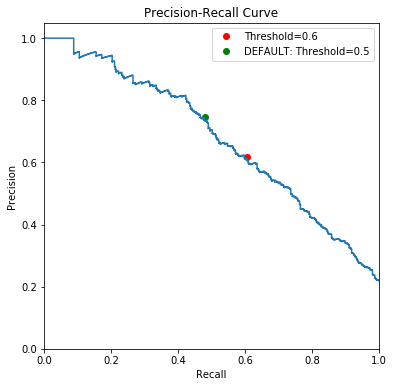

In [59]:
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(0.606, 0.617, 'ro', label='Threshold=0.6')
plt.plot(0.482, 0.746, 'go', label='DEFAULT: Threshold=0.5')
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

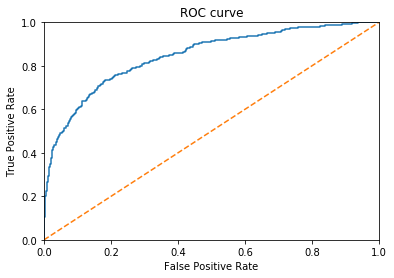

Area under ROC curve: 0.8464226737398606


In [60]:
plotROC(target_valid, probabilities_one_valid)

We can see that are become more then we use LogisticRegression.

### Final step, fit best model

#### Fit with downsampled.

In [61]:
tree = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=100)
tree.fit(features_downsampled, target_downsampled)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [62]:
probabilities_valid = tree.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

In [63]:
predicted_valid = probabilities_one_valid > 0.6
f_1 = f1_score(predicted_valid, target_test)

In [64]:
print('F1 - {}'.format(f_1))

F1 - 0.5938967136150235


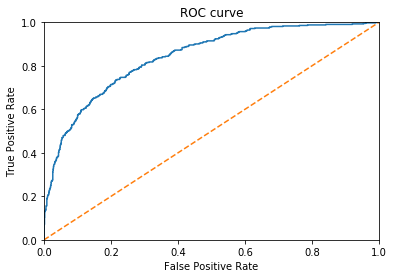

Area under ROC curve: 0.8420647877062561


In [65]:
plotROC(target_test, probabilities_one_valid)

#### Fit with upsampled

In [66]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [67]:
tree = RandomForestClassifier(random_state=12345, max_depth=5, n_estimators=100)
tree.fit(features_upsampled, target_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [68]:
probabilities_valid = tree.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

In [69]:
predicted_valid = probabilities_one_valid > 0.6
f_1 = f1_score(predicted_valid, target_test)

In [70]:
print('F1 - {}'.format(f_1))

F1 - 0.5815423514538558


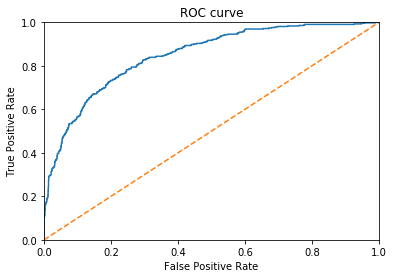

Area under ROC curve: 0.8478745141071939


In [71]:
plotROC(target_test, probabilities_one_valid)

### Conclusion

We use prepare our data to classification and fitting model. Fill na to mean and deffirence balance which depence on tenure. Also we taste LogisticRegression and Forest. Chosen Forest because of best quality. We use downsampling to balance our sample. Use Scalar for numerical columns. Play with threshold.

We chosen the best model and got good quality of it. 